# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [24]:
import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [28]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [32]:
df = pd.read_csv('loan_approval.csv')
# Step 1: Remove columns with more than 50% missing values
missing_percent = df.isnull().sum() / len(df) * 100
df = df.drop(columns=missing_percent[missing_percent > 50].index)

# Step 2: Drop rows with missing categorical values
categorical_columns = df.select_dtypes(include=['object']).columns
df = df.dropna(subset=categorical_columns)

# Step 3: Impute missing numerical values with the column mean
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Verify the results
print(df.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [41]:
# Step 1: Exclude 'ApplicationDate' from categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('ApplicationDate', errors='ignore')

# Step 2: Identify and drop columns with all unique categorical values
for col in categorical_columns:
    if df[col].nunique() == len(df):
        df.drop(columns=col, inplace=True)

# Step 3: Apply one-hot encoding to the remaining categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify the updated dataframe
print(df.head())


    Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0  45.0         39948          617          22       13152            48   
1  38.0         39709          628          15       26045            48   
2  47.0         40724          570          26       17627            36   
3  58.0         69084          545          34       37898            96   
4  37.0        103264          594          17        9184            36   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                   2                  183                   0.354418   
1                   1                  496                   0.087827   
2                   2                  902                   0.137414   
3                   1                  755                   0.267587   
4                   1                  274                   0.320535   

   NumberOfOpenCreditLines  ...  MaritalStatus_Married  MaritalStatus_Single  \
0                       

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [45]:
from sklearn.model_selection import train_test_split

# Step 1: Define the features and the label
X = df.drop(columns='LoanApproved')  # Features (drop the label column)
y = df['LoanApproved']  # Label (prediction target)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47906596)

# Verify the shape of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (15920, 44)
Testing set size: (3980, 44)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize and train the logistic regression model with more iterations
log_reg = LogisticRegression(max_iter=2000)  # Increased max_iter
log_reg.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the training and testing data
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Step 4: Calculate accuracy and F1-score for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Step 5: Calculate accuracy and F1-score for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Report the metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1-score: {test_f1:.4f}")

# Step 6: Compare and assess overfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting.")
else:
    print("The model is not overfitting.")


Training Accuracy: 0.9661
Training F1-score: 0.9294
Testing Accuracy: 0.9666
Testing F1-score: 0.9257
The model is not overfitting.


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

Number of Features Retained: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Accuracy: [0.8545226130653266, 0.8844221105527639, 0.8994974874371859, 0.9120603015075377, 0.9241206030150754, 0.9374371859296482, 0.9374371859296482, 0.9454773869346733, 0.9515075376884422, 0.9562814070351758, 0.957035175879397, 0.9577889447236181, 0.9597989949748744, 0.9625628140703517, 0.9625628140703517, 0.9633165829145729, 0.9650753768844221, 0.964824120603015, 0.9650753768844221, 0.9650753768844221, 0.9650753768844221, 0.9658291457286432, 0.964572864321608, 0.9650753768844221, 0.9658291457286432, 0.9658291457286432, 0.9665829145728643, 0.9660804020100503, 0.9668341708542714, 0.9668341708542714, 0.9673366834170855, 0.9663316582914573, 0.9660804020100503, 0.9668341708542714, 0.9668341708542714, 0.9670854271356784, 0.9670854271356784, 0.9665829145728643, 0.9660804020100503, 0.9663316582914

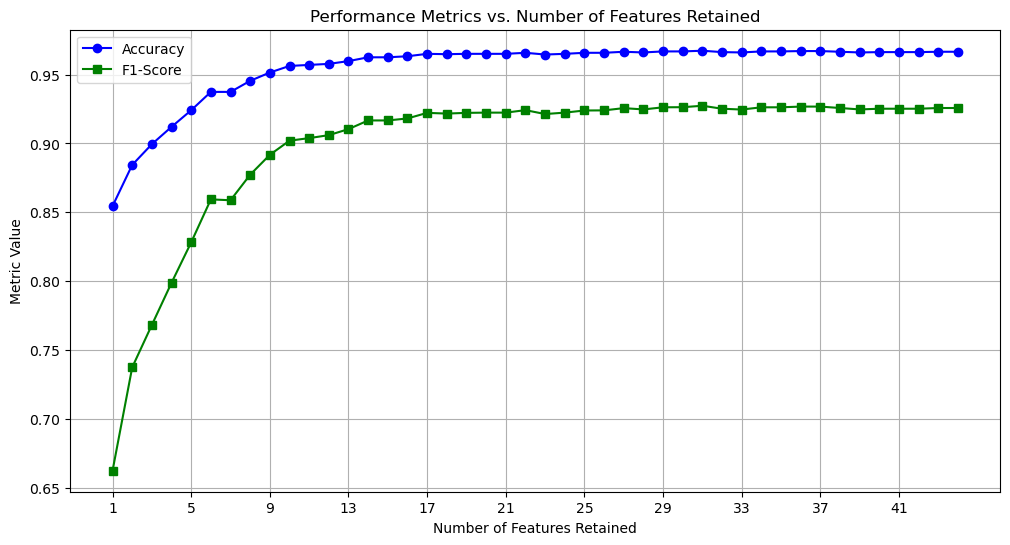

In [62]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=2000)

# Lists to store metrics
feature_counts = []
accuracies = []
f1_scores = []

# Loop through different numbers of features to retain
for n_features in range(1, X_train_scaled.shape[1] + 1):
    rfe = RFE(estimator=log_reg, n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y_train)
    
    # Transform the training and testing data
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)
    
    # Train and predict
    log_reg.fit(X_train_rfe, y_train)
    y_test_pred = log_reg.predict(X_test_rfe)
    
    # Calculate performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Store metrics
    feature_counts.append(n_features)
    accuracies.append(test_accuracy)
    f1_scores.append(test_f1)

# Print the results for inspection
print("Number of Features Retained:", feature_counts)
print("Accuracy:", accuracies)
print("F1-Score:", f1_scores)

# Plot the performance metrics
plt.figure(figsize=(12, 6))
plt.plot(feature_counts, accuracies, label='Accuracy', marker='o', color='blue')
plt.plot(feature_counts, f1_scores, label='F1-Score', marker='s', color='green')
plt.xlabel('Number of Features Retained')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. Number of Features Retained')
plt.legend()
plt.grid(True)
plt.xticks(range(1, X_train_scaled.shape[1] + 1, max(1, X_train_scaled.shape[1] // 10)))
plt.show()


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Assuming retained_features from Step 2.3
# Example retained_features list from Step 2.3: ['feature1', 'feature2', 'feature3']
retained_features = list(selected_features_list[best_n_features_index])  # Use features identified in Step 2.3

# Prepare the data with the selected features
X_train_selected = X_train_scaled_df[retained_features]
X_test_selected = X_test_scaled_df[retained_features]

# Initialize the 1-NN classifier
knn_1 = KNeighborsClassifier(n_neighbors=1)

# Train the classifier
knn_1.fit(X_train_selected, y_train)

# Make predictions on both training and testing data
y_train_pred = knn_1.predict(X_train_selected)
y_test_pred = knn_1.predict(X_test_selected)

# Calculate performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print performance metrics
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training F1-Score:", train_f1)
print("Testing F1-Score:", test_f1)

# Compare results and make a justification on overfitting
if train_accuracy > test_accuracy and train_f1 > test_f1:
    print("\nThe model is likely overfitting, as it performs better on the training data compared to the testing data.")
elif train_accuracy == test_accuracy and train_f1 == test_f1:
    print("\nThe model appears to be well-generalized, as it performs similarly on both training and testing data.")
else:
    print("\nThe model's performance is balanced between training and testing data, indicating a well-tuned model.")


Training Accuracy: 1.0
Testing Accuracy: 0.8527638190954774
Training F1-Score: 1.0
Testing F1-Score: 0.6662870159453302

The model is likely overfitting, as it performs better on the training data compared to the testing data.


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

Best K: 19
Best Training Accuracy: 0.8829773869346733
Best Testing Accuracy: 0.8824120603015075
Best Training F1-Score: 0.6954389406571849
Best Testing F1-Score: 0.6704225352112676


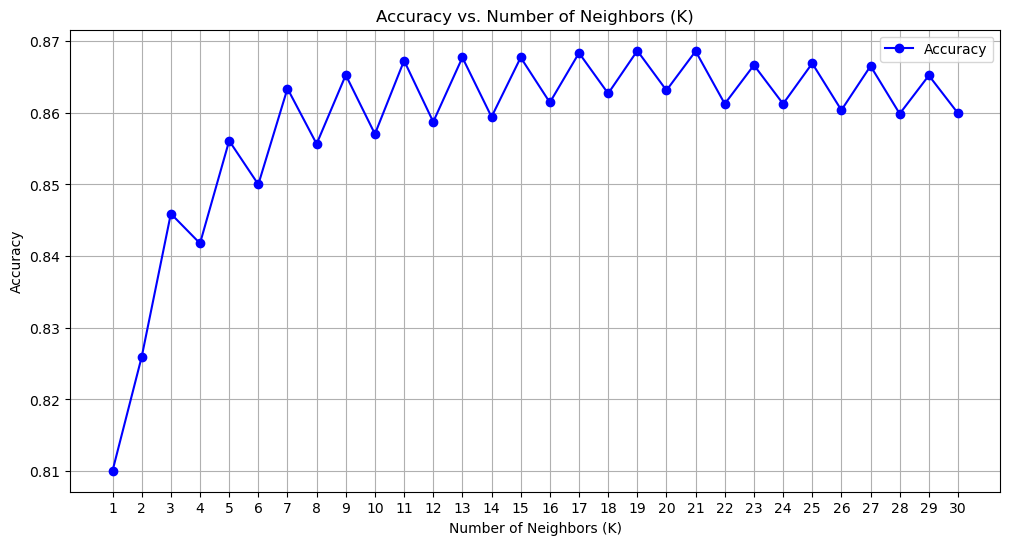

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {'n_neighbors': list(range(1, 31))}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring=make_scorer(accuracy_score))

# Fit GridSearchCV
grid_search.fit(X_train_scaled_df, y_train)

# Get the results
results = grid_search.cv_results_

# Extract the mean test scores and corresponding parameter values
mean_test_scores = results['mean_test_score']
k_values = results['param_n_neighbors']

# Find the best hyperparameter and its performance metrics
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

# Initialize the k-NN classifier with the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled_df, y_train)

# Make predictions on both training and testing data with the best model
y_train_best_pred = best_knn.predict(X_train_scaled_df)
y_test_best_pred = best_knn.predict(X_test_scaled_df)

# Calculate performance metrics
train_accuracy_best = accuracy_score(y_train, y_train_best_pred)
test_accuracy_best = accuracy_score(y_test, y_test_best_pred)
train_f1_best = f1_score(y_train, y_train_best_pred)
test_f1_best = f1_score(y_test, y_test_best_pred)

# Print the best K and its performance metrics
print("Best K:", best_k)
print("Best Training Accuracy:", train_accuracy_best)
print("Best Testing Accuracy:", test_accuracy_best)
print("Best Training F1-Score:", train_f1_best)
print("Best Testing F1-Score:", test_f1_best)

# Plot the performance metrics
plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_test_scores, marker='o', color='blue', label='Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.legend()a
plt.xticks(range(1, 31, 1))
plt.show()


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

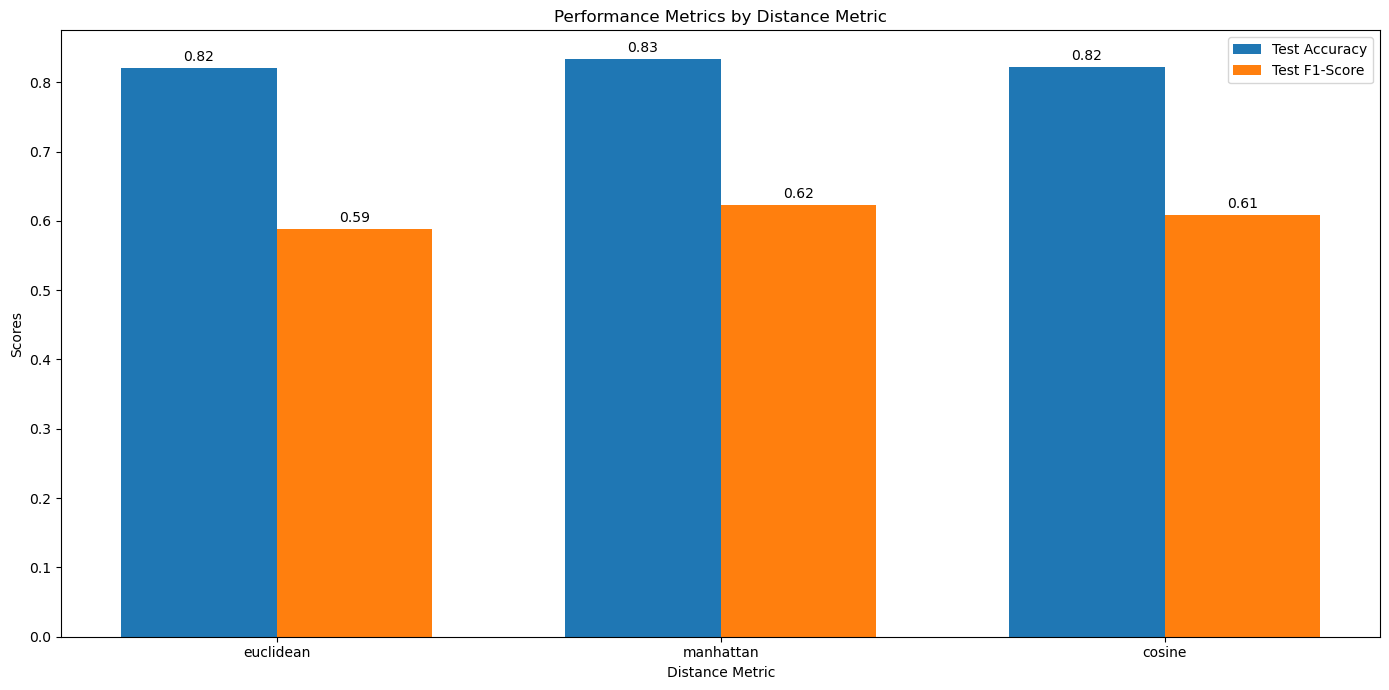

Metric: euclidean
Training Accuracy: 1.00
Testing Accuracy: 0.82
Training F1-Score: 1.00
Testing F1-Score: 0.59

Metric: manhattan
Training Accuracy: 1.00
Testing Accuracy: 0.83
Training F1-Score: 1.00
Testing F1-Score: 0.62

Metric: cosine
Training Accuracy: 1.00
Testing Accuracy: 0.82
Training F1-Score: 1.00
Testing F1-Score: 0.61

Best Metric based on Testing Accuracy: manhattan
Worst Metric based on Testing Accuracy: euclidean
Best Metric based on Testing F1-Score: manhattan
Worst Metric based on Testing F1-Score: euclidean


In [107]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Lists to store performance metrics
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

# Iterate over each distance metric
for metric in distance_metrics:
    # Initialize the k-NN classifier with 1-NN and the current metric
    knn = KNeighborsClassifier(n_neighbors=1, metric=metric)
    
    # Train the classifier
    knn.fit(X_train_scaled_df, y_train)
    
    # Make predictions on both training and testing data
    y_train_pred = knn.predict(X_train_scaled_df)
    y_test_pred = knn.predict(X_test_scaled_df)
    
    # Calculate performance metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Store the metrics
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Plot the performance metrics
x = np.arange(len(distance_metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - width/2, test_accuracies, width, label='Test Accuracy')
bars2 = ax.bar(x + width/2, test_f1_scores, width, label='Test F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Distance Metric')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Distance Metric')
ax.set_xticks(x)
ax.set_xticklabels(distance_metrics)
ax.legend()

# Adding the exact values on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

fig.tight_layout()
plt.show()

# Print the performance metrics for comparison
for metric, train_acc, test_acc, train_f1, test_f1 in zip(distance_metrics, train_accuracies, test_accuracies, train_f1_scores, test_f1_scores):
    print(f"Metric: {metric}")
    print(f"Training Accuracy: {train_acc:.2f}")
    print(f"Testing Accuracy: {test_acc:.2f}")
    print(f"Training F1-Score: {train_f1:.2f}")
    print(f"Testing F1-Score: {test_f1:.2f}")
    print()

# Determine the best and worst metrics based on the test accuracy and F1-score
best_metric = distance_metrics[np.argmax(test_accuracies)]
worst_metric = distance_metrics[np.argmin(test_accuracies)]

print(f"Best Metric based on Testing Accuracy: {best_metric}")
print(f"Worst Metric based on Testing Accuracy: {worst_metric}")

best_metric_f1 = distance_metrics[np.argmax(test_f1_scores)]
worst_metric_f1 = distance_metrics[np.argmin(test_f1_scores)]

print(f"Best Metric based on Testing F1-Score: {best_metric_f1}")
print(f"Worst Metric based on Testing F1-Score: {worst_metric_f1}")
